In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/arich/OneDrive/Desktop/AI LESSON/LESSONS/8. Supervised Learning/Project/customer_churn_dataset.csv")
data = df.copy()
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


##### **Dataset Columns explanation:**

- **Age** → Age of the customer
- **Gender** → Gender of the customer (Male/Female)
- **Tenure** → Number of months the customer has stayed with the company
- **Usage Frequency** → How frequently the customer uses the service
- **Support Calls** → Number of calls the customer has made to customer support
- **Payment Delay** → Number of times the customer has delayed payment
- **Subscription Type** → Type of subscription the customer has
- **Contract Length** → Length of the customer's contract in months
- **Total Spend** → Total amount of money spent by the customer
- **Last Interaction** → Time since the last interaction with the customer
- **Churn** → Whsther trneder chu
  )
d (Yes/No)

#### Data Preparation:

In [3]:
data.drop('CustomerID', axis=1, inplace=True)
data

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


I droped the CustomerID column because it doesn't give anyting to the model learning it is just a runing number that indicated about the customer number and not his behavior and doesn't provide any data about the customer and his habits.  
Also the numbers got to high numbers and can affect the results.

In [4]:
data.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
df_check = data.copy()

for column in df_check.columns:
    df_check[column] = pd.Series(df_check[column].unique())

print(df_check.head())

    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  22.0  Female    25.0             14.0            4.0           27.0   
1  41.0    Male    28.0             28.0            7.0           13.0   
2  47.0     NaN    27.0             10.0            2.0           29.0   
3  35.0     NaN     9.0             12.0            5.0           17.0   
4  53.0     NaN    58.0             24.0            9.0            2.0   

  Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
0             Basic         Monthly        598.0               9.0    1.0  
1          Standard          Annual        584.0              20.0    0.0  
2           Premium       Quarterly        757.0              21.0    NaN  
3               NaN             NaN        232.0              18.0    NaN  
4               NaN             NaN        533.0              29.0    NaN  


Because of the Total Spend values I will do feature scaling.

In [6]:
data.duplicated().sum()

0

Moving from categorial to logical data using 'get_dummies' will be done after the data exploration and before the model training.

#### Data exploration:

<Axes: xlabel='Churn', ylabel='count'>

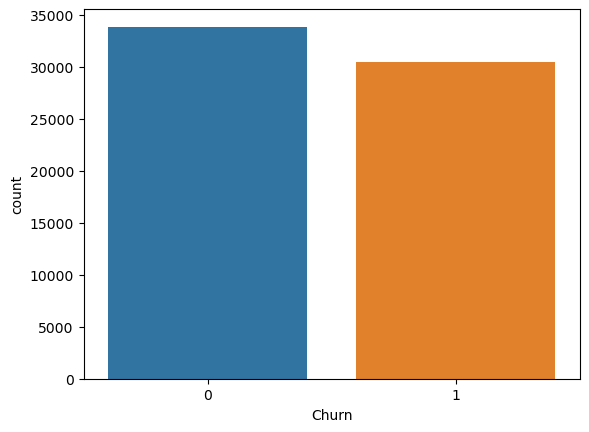

In [7]:
sns.countplot(data=data, x='Churn', hue='Churn', legend=False)

We can see that there is a balance in the label data  

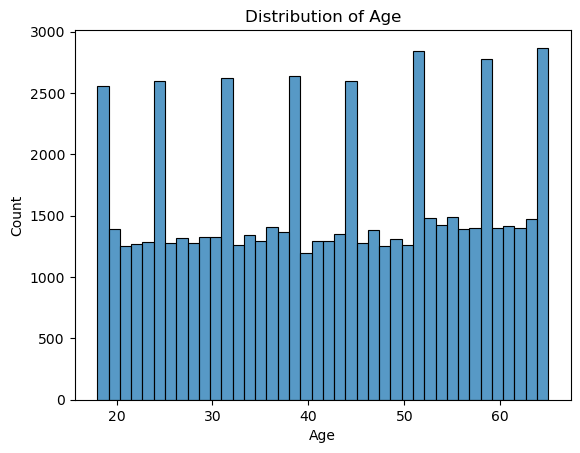

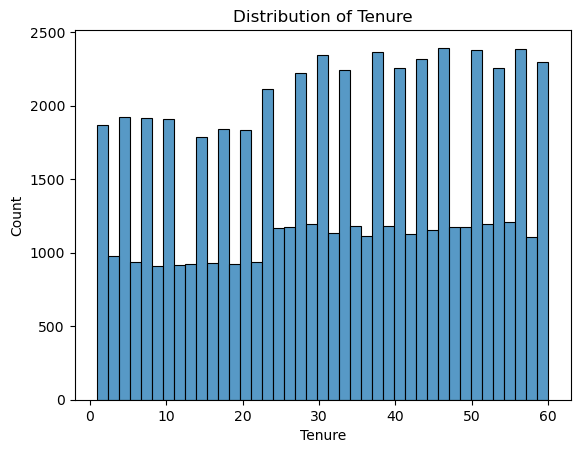

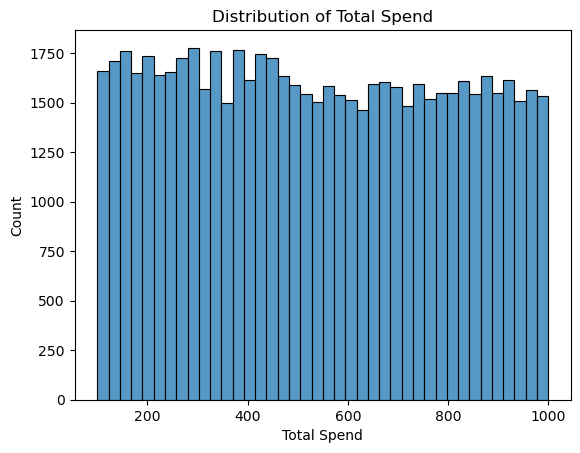

In [8]:
sns.histplot(data=data, x='Age')
plt.title('Distribution of Age')
plt.show()

sns.histplot(data=data, x='Tenure')
plt.title('Distribution of Tenure')
plt.show()

sns.histplot(data=data, x='Total Spend')
plt.title('Distribution of Total Spend')
plt.show()

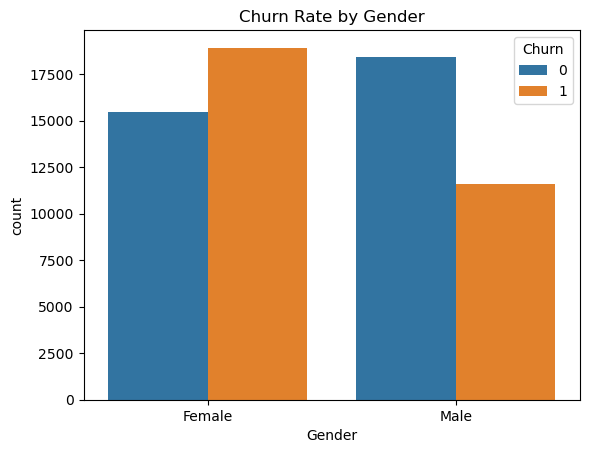

In [9]:
sns.countplot(data=data, x='Gender', hue='Churn')
plt.title('Churn Rate by Gender')
plt.show()

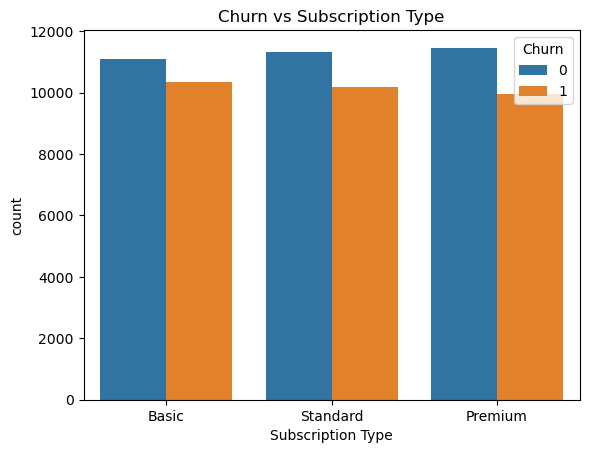

In [10]:
sns.countplot(data=data, x='Subscription Type', hue='Churn')
plt.title('Churn vs Subscription Type')
plt.show()

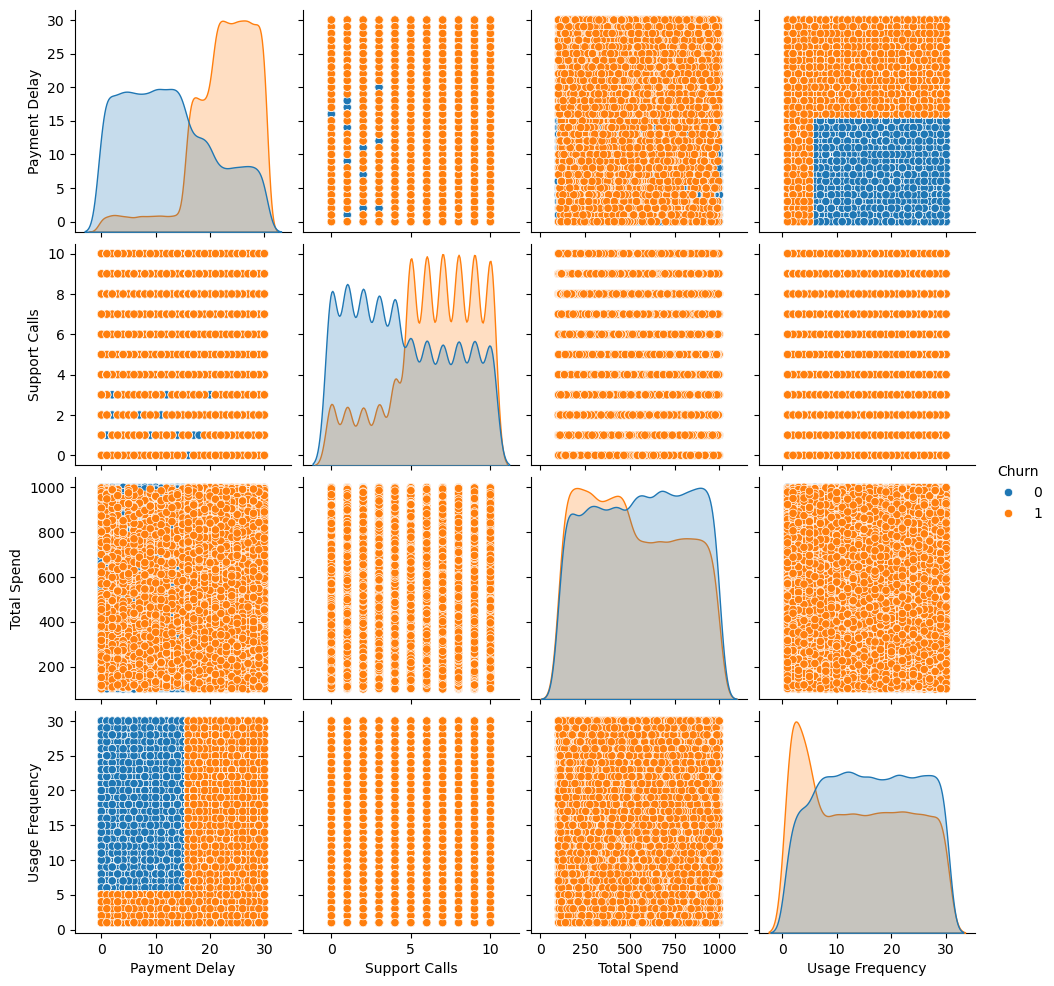

In [11]:
sns.pairplot(data=data, hue='Churn', vars=['Payment Delay', 'Support Calls','Total Spend', 'Usage Frequency'])
plt.show()

We can see if the customer have a long time of payment delay or high number of support calls this may indicate that he maybe will get Churn.   
Also lower usage frequency can indicate that he maybe get Churn.

In [12]:
df_sample = df.sample(frac=0.01, random_state=42)

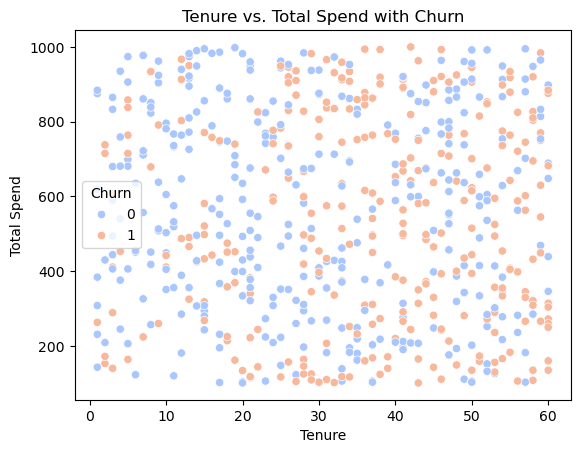

In [13]:
sns.scatterplot(data=df_sample, x='Tenure', y='Total Spend', hue='Churn', palette='coolwarm')
plt.title('Tenure vs. Total Spend with Churn')
plt.show()

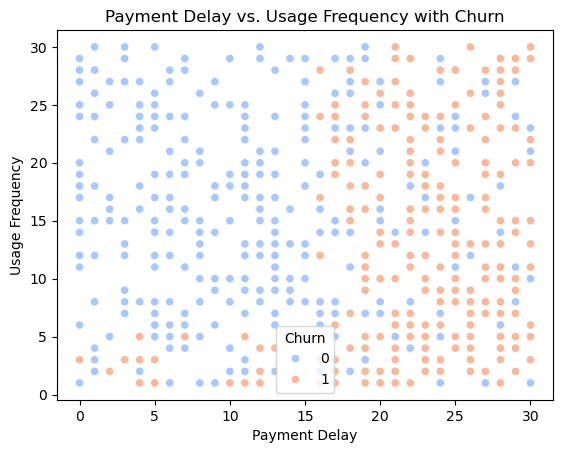

In [14]:
sns.scatterplot(data=df_sample, x='Payment Delay', y='Usage Frequency', hue='Churn', palette='coolwarm')
plt.title('Payment Delay vs. Usage Frequency with Churn')
plt.show()

In [15]:
df_logic = pd.get_dummies(data, drop_first=True)
df_logic

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,1,False,False,False,True,False
1,41,28,28,7,13,584,20,0,False,False,True,True,False
2,47,27,10,2,29,757,21,0,True,True,False,False,False
3,35,9,12,5,17,232,18,0,True,True,False,False,True
4,53,58,24,9,2,533,18,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,33,12,6,21,947,14,1,False,False,False,False,True
64370,37,6,1,5,22,923,9,1,True,False,True,False,False
64371,25,39,14,8,30,327,20,1,True,True,False,True,False
64372,50,18,19,7,22,540,13,1,False,False,True,True,False


#### Classification model training:

Because of the Total Spend values that is high than other columns values and also because we will use some model that are sensitive to distance, I will do feature scaling.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_logic.drop('Churn', axis=1)
y = df_logic['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

####  Logistic Regression:

In [17]:
from sklearn.linear_model import LogisticRegressionCV #logistic model with cross validation

logistic_model = LogisticRegressionCV(cv=5, max_iter=100, solver='saga', penalty='l2', Cs=np.logspace(0,4,10))
logistic_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                     cv=5, solver='saga')

In [18]:
logistic_model.coef_

array([[ 0.26910447,  0.61144934, -0.52097572,  1.02276991,  1.86056917,
        -0.25855305, -0.01177758, -0.56832292, -0.03324803, -0.02925145,
         0.15956153, -0.07176683]])

In [19]:
lr_y_predict = logistic_model.predict(scaled_X_test)
lr_y_predict

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix, classification_report

lr_accuracy = accuracy_score(y_test, lr_y_predict)
lr_precision = precision_score(y_test, lr_y_predict)
lr_recall = recall_score(y_test, lr_y_predict)
lr_f1 = f1_score(y_test, lr_y_predict)

print(f"The accuracy score is: {lr_accuracy}")
print(f"The precision score is: {lr_precision}")
print(f"The recall score is: {lr_recall}")
print(f"The F1 score is: {lr_f1}")

The accuracy score is: 0.8289753016103143
The precision score is: 0.8163221360895779
The recall score is: 0.8260159058720994
The F1 score is: 0.8211404126279309


Because the recall score is high we can say that we don't have the Accuracy paradox. 
Fartheremore the F1 acore is above 0.8 and the numbers from both categories are pretty the same (as we saw in the bar at the data exploration section) so this is strengthens the claim that we are not in the Accuracy paradox.  
Also the Recall score is above 0.8 so we can say that the positive prediction of the model is reliable.

In [21]:
confusion_matrix(y_test, lr_y_predict)

array([[8428, 1706],
       [1597, 7582]], dtype=int64)

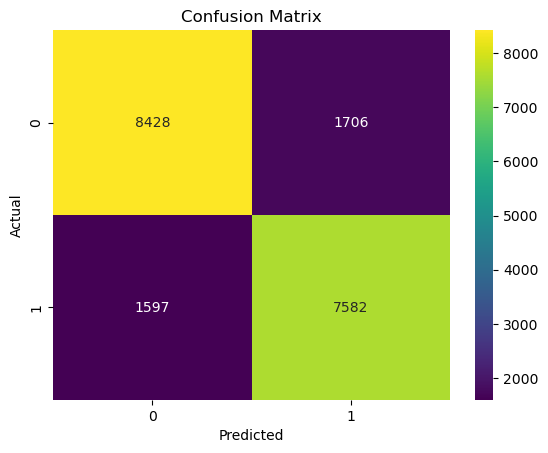

In [22]:
cm = confusion_matrix(y_test, lr_y_predict)
cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

####  KNN:

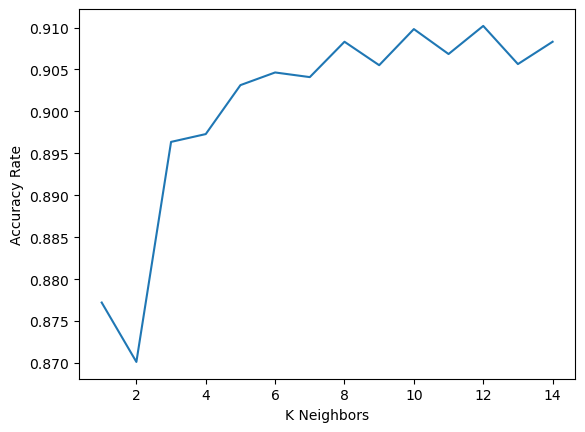

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

cv_scores = []

for k in range(1,15):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, scaled_X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(range(1,15), cv_scores)
plt.ylabel('Accuracy Rate')
plt.xlabel('K Neighbors')
plt.show()

##### About the model: 

I choose range of 1 to 17 because I don't see segnificant improvment over it and I didn't wanted it to do too much runs so it will take too long time (at home I did a range of 1-30), also about the CV I choose 5 so it want take to long, 5 is OK for our needs.  
I think that k=8 is good enough, because I don't see a big improvment in the accuracy of the model over it and I don't want the model to be too complicate and make much more calculation that won't help a lot. 

In [24]:
optimal_k = 8

knn_optimal = KNeighborsClassifier(n_neighbors=9)
knn_optimal.fit(scaled_X_train, y_train)

knn_y_pred = knn_optimal.predict(scaled_X_test)

In [25]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     10134
           1       0.88      0.94      0.91      9179

    accuracy                           0.91     19313
   macro avg       0.91      0.91      0.91     19313
weighted avg       0.91      0.91      0.91     19313



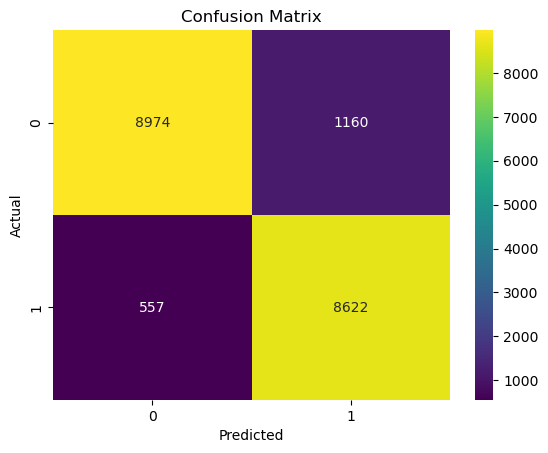

In [26]:
cm = confusion_matrix(y_test, knn_y_pred)
cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix, classification_report

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)

print(f"The accuracy score is: {knn_accuracy}")
print(f"The precision score is: {knn_precision}")
print(f"The recall score is: {knn_recall}")
print(f"The F1 score is: {knn_f1}")

The accuracy score is: 0.9110961528504117
The precision score is: 0.8814148435902679
The recall score is: 0.9393180084976577
The F1 score is: 0.9094457043404883


#### SVM:

###### NOTE:
I tried first to check for the best parameters on all the data but it took too long and I had to stop it. so for just finding the parameters I took 10% of the data. 

In [28]:
df_sample = df_logic.sample(frac=0.1, random_state=42)


X = df_sample.drop('Churn', axis=1)
y = df_sample['Churn']

sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
sample_scaled_X_train = scaler.fit_transform(sample_X_train)
sample_scaled_X_test = scaler.transform(sample_X_test)

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_model = SVC()
param_grid = {
    'C': [0.01, 0.1, 1, 100],
    'kernel': ['linear','rbf', 'poly']
}


grid = GridSearchCV(svc_model, param_grid, scoring='accuracy')
grid.fit(sample_scaled_X_train,sample_y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [30]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [31]:
optimal_svc_model = SVC(kernel='rbf', C=1)
optimal_svc_model.fit(scaled_X_train,y_train)

SVC(C=1)

In [32]:
svm_y_pred = optimal_svc_model.predict(scaled_X_test)
svm_y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [33]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10134
           1       0.93      0.95      0.94      9179

    accuracy                           0.94     19313
   macro avg       0.94      0.94      0.94     19313
weighted avg       0.94      0.94      0.94     19313



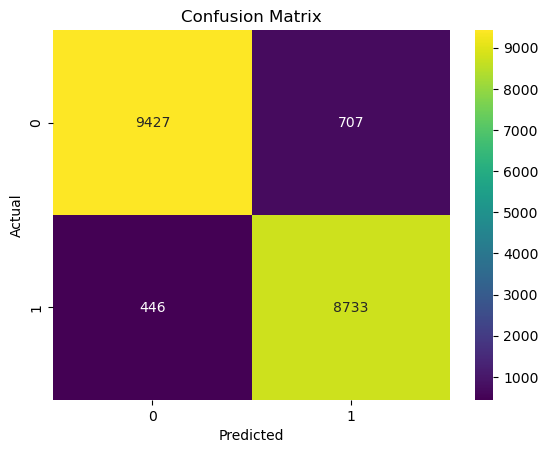

In [34]:
cm = confusion_matrix(y_test, svm_y_pred)
cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

There are good results with this model, the best we saw until now.

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix, classification_report

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

print(f"The accuracy score is: {svm_accuracy}")
print(f"The precision score is: {svm_precision}")
print(f"The recall score is: {svm_recall}")
print(f"The F1 score is: {svm_f1}")

The accuracy score is: 0.9402992802775333
The precision score is: 0.9251059322033899
The recall score is: 0.9514108290663471
The F1 score is: 0.938074010419464


#### Random Forest:

We won't use the feature scaling in Decision tree

##### Note:  
This run takes time, in my computer tooks about 10 min

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


n_estimators = [64, 100, 128, 200]
max_features = [2,4,6]
bootstrap = [True]
oob_score = [False]

grid_param = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score
}

random_forest_model = RandomForestClassifier()

grid_model = GridSearchCV(random_forest_model, grid_param)

grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_features': [2, 4, 6],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [False]})

In [37]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 6, 'n_estimators': 200, 'oob_score': False}

In [38]:
optimal_random_forest = RandomForestClassifier(n_estimators=100, max_features=6, bootstrap=True, oob_score=False)
optimal_random_forest.fit(X_train,y_train)

RandomForestClassifier(max_features=6)

In [39]:
forest_y_pred = optimal_random_forest.predict(X_test)
forest_y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [40]:
print("classification report:")
print(classification_report(y_test, forest_y_pred))

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10134
           1       1.00      1.00      1.00      9179

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



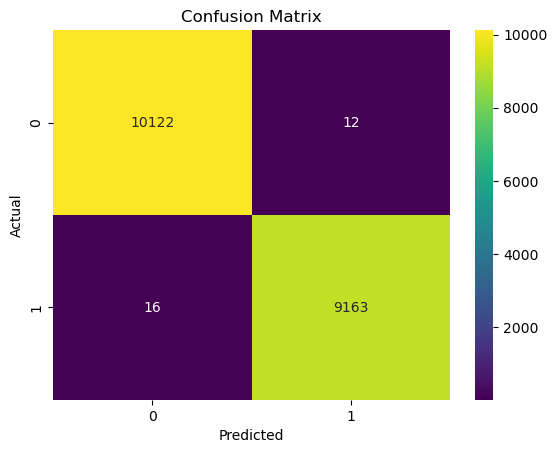

In [41]:
cm = confusion_matrix(y_test, forest_y_pred)
cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix, classification_report

forest_accuracy = accuracy_score(y_test, forest_y_pred)
forest_precision = precision_score(y_test, forest_y_pred)
forest_recall = recall_score(y_test, forest_y_pred)
forest_f1 = f1_score(y_test, forest_y_pred)

print(f"The accuracy score is: {forest_accuracy}")
print(f"The precision score is: {forest_precision}")
print(f"The recall score is: {forest_recall}")
print(f"The F1 score is: {forest_f1}")

The accuracy score is: 0.9985501993475897
The precision score is: 0.998692098092643
The recall score is: 0.9982568907288376
The F1 score is: 0.9984744469870328


#### Check the models results:

In [43]:
results = {
    'Model': ['Random Forest', 'SVM', 'KNN', 'Logistic Regression'],
    'Accuracy': [forest_accuracy, svm_accuracy, knn_accuracy, lr_accuracy],
    'Recall': [forest_recall, svm_recall, knn_recall, lr_recall],
    'F1-Score': [forest_f1, svm_f1, knn_f1, lr_f1]
}

results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df

,Accuracy,Recall,F1-Score
Model,,,
Random Forest,0.998550,0.998257,0.998474
SVM,0.940299,0.951411,0.938074
KNN,0.911096,0.939318,0.909446
Logistic Regression,0.828975,0.826016,0.821140


We can see that the Random Forest model gives the best results.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

churn_forest_model =RandomForestClassifier(n_estimators=200, max_features=6, bootstrap=True, oob_score=False)
churn_forest_model.fit(scaled_X,y)

RandomForestClassifier(max_features=6, n_estimators=200)

#### Exporting the scaler and the model:

In [45]:
from joblib import dump, load

dump(scaler, 'churn_forest_model_scaler.joblib')
dump(churn_forest_model, 'churn_forest_model.joblib')

['churn_forest_model.joblib']

#### Loading the model and using it:

In [46]:
loaded_converter = load('churn_forest_model_scaler.joblib')
loaded_model = load('churn_forest_model.joblib')

I don't have new data to test on so I did it on X again just for showing that it is working:

In [47]:
transformed_data = loaded_converter.fit_transform(X)
prediction = loaded_model.predict(transformed_data)
prediction

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)